In [96]:
import pandas as pd
import numpy as np
## Age , Daily_Usage_Hours , Sleep_Hours , Parental_Control , Time_on_Gaming , Time_on_Education , Addiction_Level

In [97]:
df = pd.read_csv('teen_phone_addiction_dataset.csv' , usecols=['Age','Daily_Usage_Hours','Sleep_Hours','Time_on_Gaming','Time_on_Education','Addiction_Level'])

In [98]:
df.head()

,Age,Daily_Usage_Hours,Sleep_Hours,Time_on_Gaming,Time_on_Education,Addiction_Level
0,13,4.0,6.1,1.7,1.2,10.0
1,17,5.5,6.5,4.0,1.8,10.0
2,13,5.8,5.5,1.5,0.4,9.2
3,18,3.1,3.9,1.6,0.8,9.8
4,14,2.5,6.7,0.9,1.1,8.6


In [99]:
df.shape

(3000, 6)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3000 non-null   int64  
 1   Daily_Usage_Hours  3000 non-null   float64
 2   Sleep_Hours        3000 non-null   float64
 3   Time_on_Gaming     3000 non-null   float64
 4   Time_on_Education  3000 non-null   float64
 5   Addiction_Level    3000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 140.8 KB


In [101]:
df.describe()

,Age,Daily_Usage_Hours,Sleep_Hours,Time_on_Gaming,Time_on_Education,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,15.969667,5.020667,6.489767,1.525267,1.016333,8.881900
std,1.989489,1.956501,1.490713,0.932701,0.648341,1.609598
min,13.000000,0.000000,3.000000,0.000000,0.000000,1.000000
25%,14.000000,3.700000,5.500000,0.800000,0.500000,8.000000
50%,16.000000,5.000000,6.500000,1.500000,1.000000,10.000000
75%,18.000000,6.400000,7.500000,2.200000,1.500000,10.000000
max,19.000000,11.500000,10.000000,4.000000,3.000000,10.000000


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x = df.drop(columns=['Addiction_Level'])
y = df['Addiction_Level']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [104]:
x_train.head()

,Age,Daily_Usage_Hours,Sleep_Hours,Time_on_Gaming,Time_on_Education
611,16,7.6,7.9,1.1,1.9
530,18,6.1,4.8,2.3,0.0
2787,14,5.1,6.0,1.4,0.6
49,14,8.1,7.2,2.2,1.9
1883,13,1.3,3.4,0.0,0.7


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18968\394937378.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


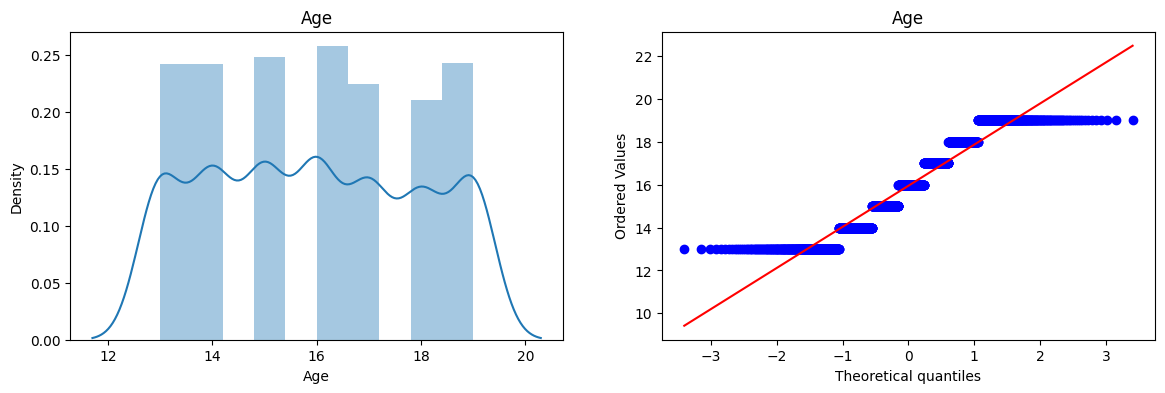

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18968\394937378.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


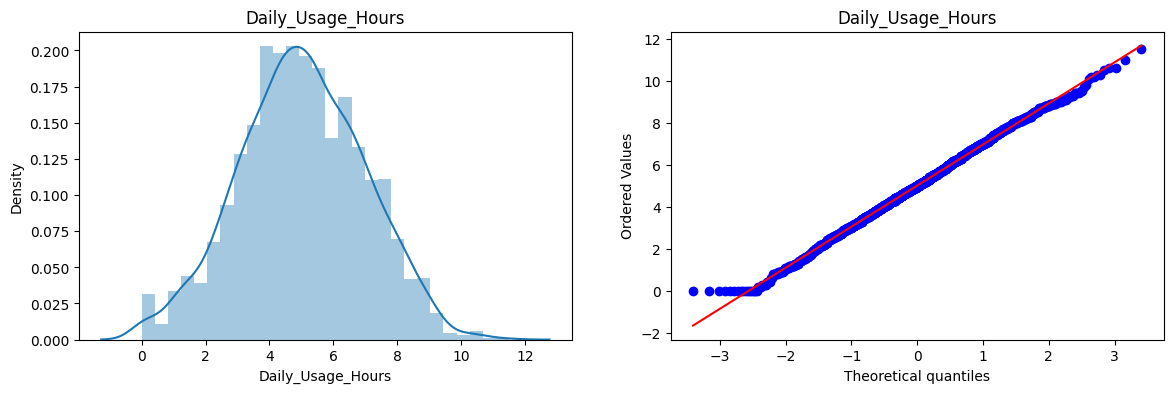

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18968\394937378.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


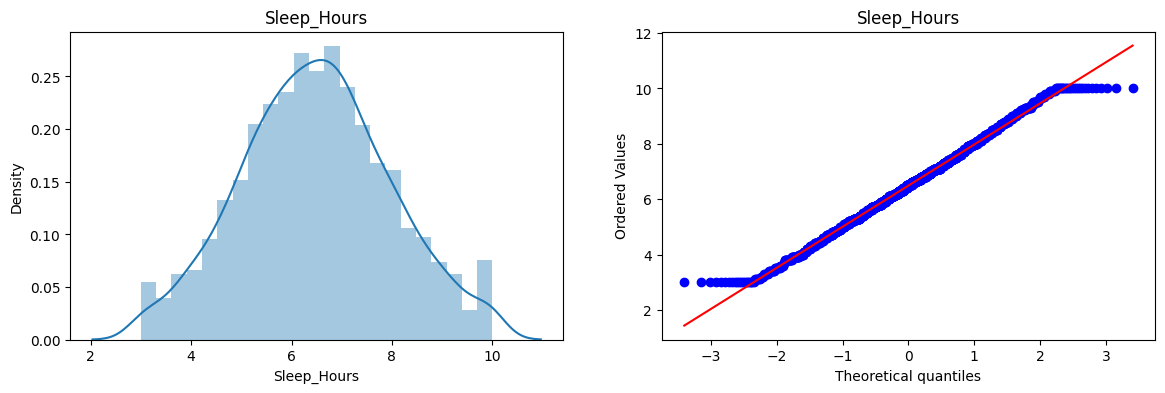

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18968\394937378.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


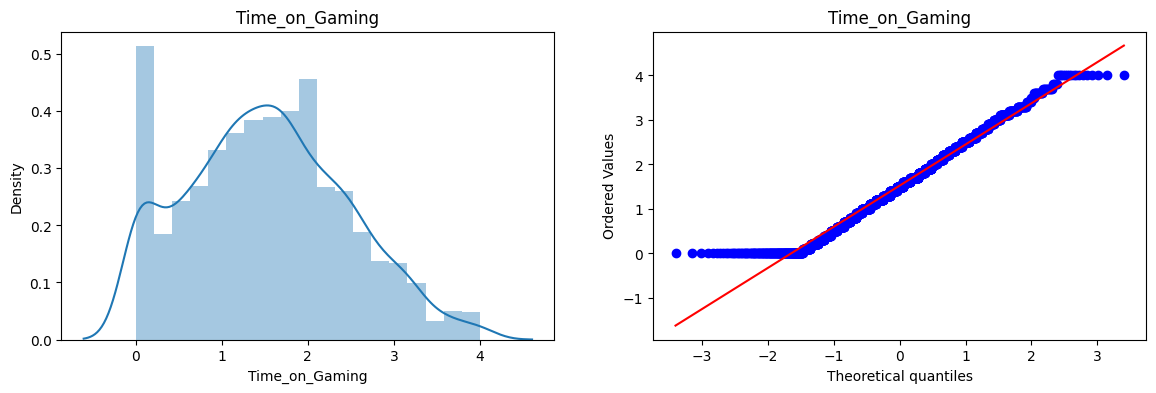

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18968\394937378.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


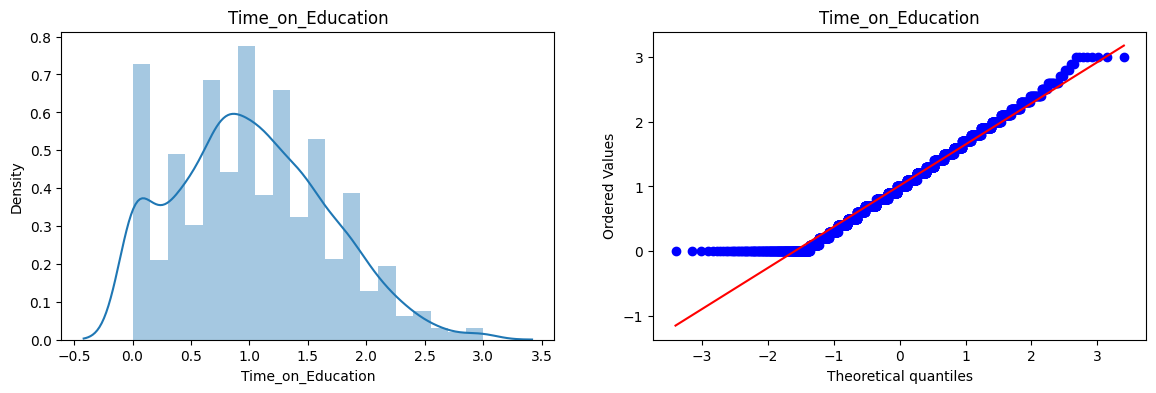

In [105]:
# Plotting the distplots without any transformation
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [106]:
from sklearn.preprocessing import PowerTransformer

In [107]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)

x_train_transform = pt.fit_transform(x_train[['Daily_Usage_Hours','Sleep_Hours']])
x_test_transform = pt.transform(x_test[['Daily_Usage_Hours','Sleep_Hours']])



x_train_transform = pd.DataFrame(x_train_transform,columns=['Daily_Usage_Hours','Sleep_Hours'])
x_test_transform = pd.DataFrame(x_test_transform,columns=['Daily_Usage_Hours','Sleep_Hours'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18968\3209570372.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18968\3209570372.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transform[col])


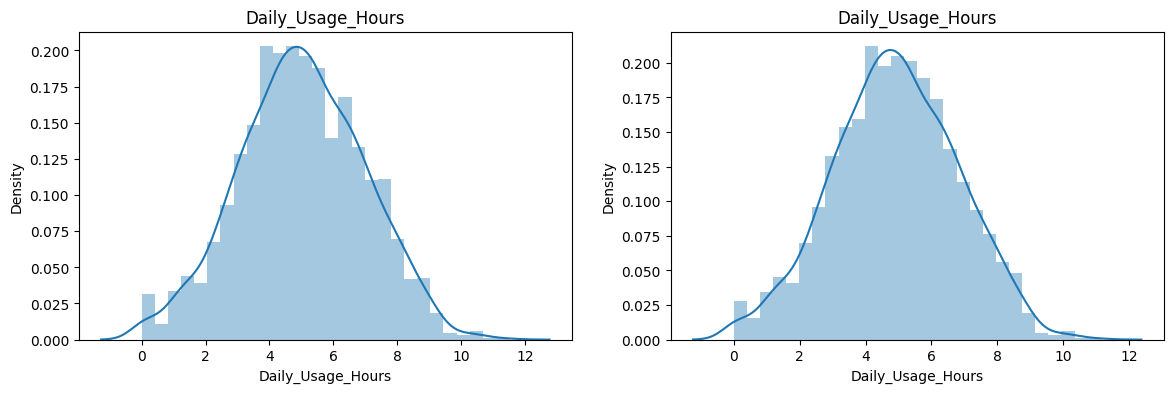

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18968\3209570372.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18968\3209570372.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transform[col])


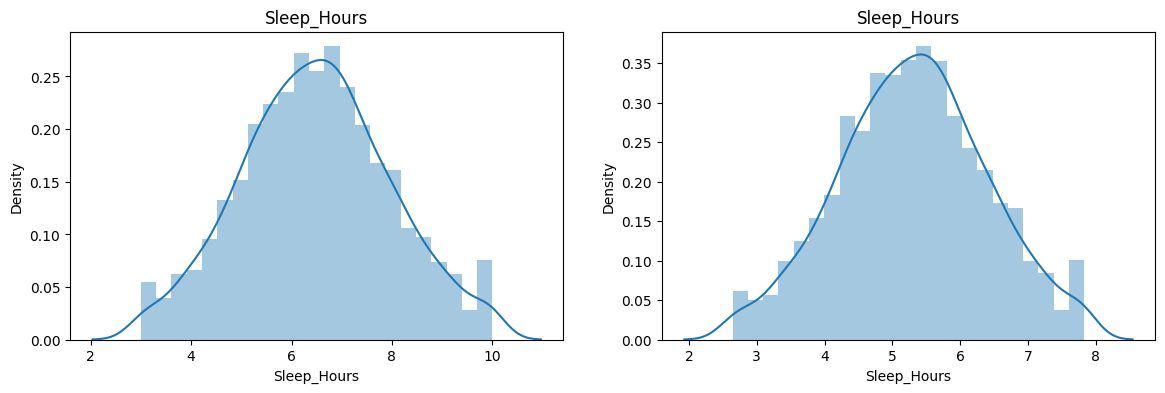

In [108]:
for col in x_train_transform.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_train_transform[col])
    plt.title(col)

    plt.show()

In [109]:
x_train.head()

,Age,Daily_Usage_Hours,Sleep_Hours,Time_on_Gaming,Time_on_Education
611,16,7.6,7.9,1.1,1.9
530,18,6.1,4.8,2.3,0.0
2787,14,5.1,6.0,1.4,0.6
49,14,8.1,7.2,2.2,1.9
1883,13,1.3,3.4,0.0,0.7


In [110]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [111]:
ft = FunctionTransformer(func=np.log1p)
ft_transform_x_train = ft.fit_transform(x_train[['Age','Time_on_Gaming','Time_on_Education']])
ft_transform_x_test = ft.transform(x_test[['Age','Time_on_Gaming','Time_on_Education']])

ft_transform_x_train = pd.DataFrame(ft_transform_x_train,columns=['Age','Time_on_Gaming','Time_on_Education'])
ft_transform_x_test = pd.DataFrame(ft_transform_x_test,columns=['Age','Time_on_Gaming','Time_on_Education'])

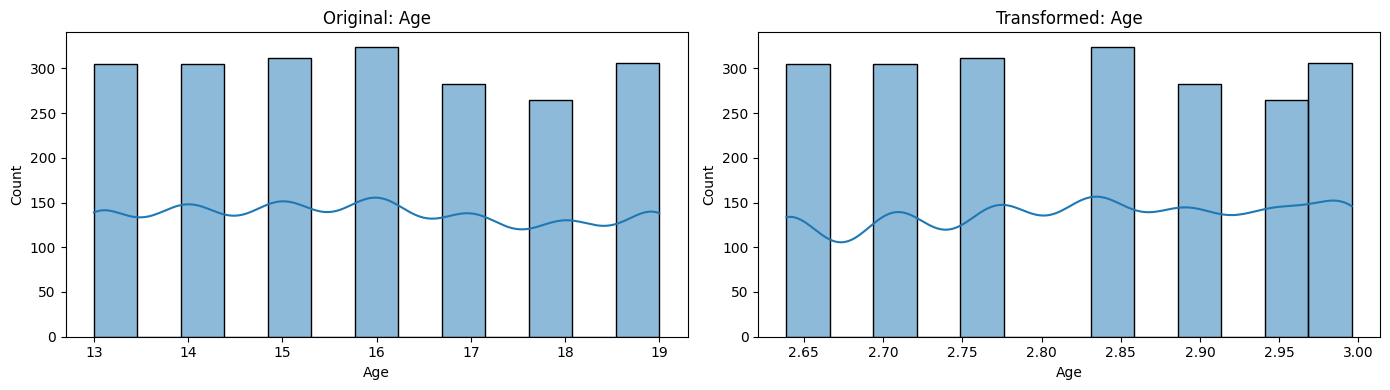

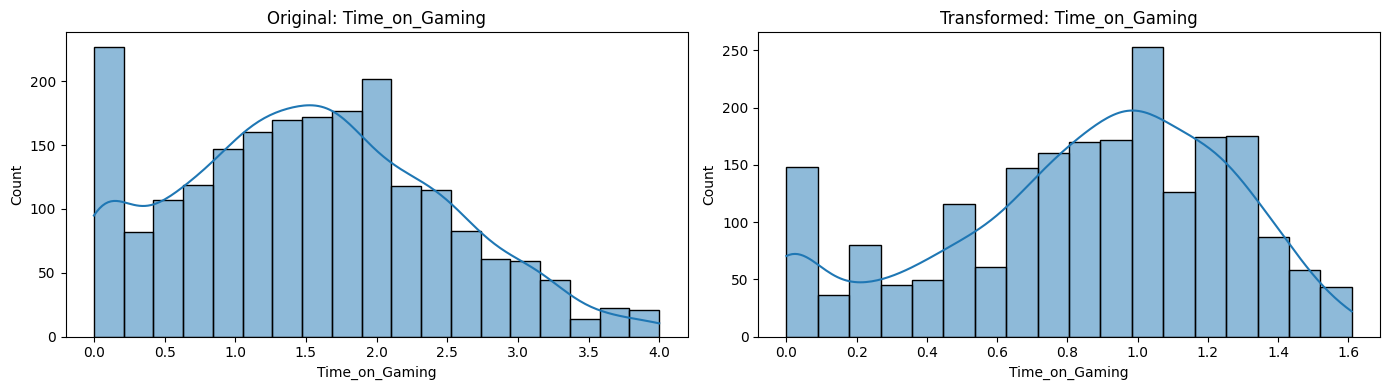

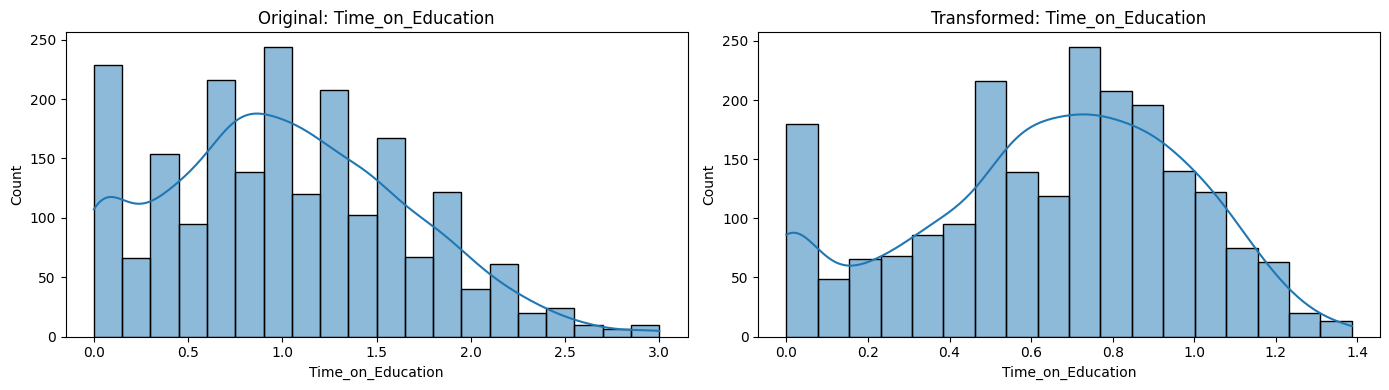

In [112]:

selected_columns = ['Age','Time_on_Gaming','Time_on_Education'] 

for col in selected_columns:
    if col in x_train.columns and col in ft_transform_x_train.columns:
        plt.figure(figsize=(14, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(x_train[col], kde=True)
        plt.title(f'Original: {col}')

        plt.subplot(1, 2, 2)
        sns.histplot(ft_transform_x_train[col], kde=True)
        plt.title(f'Transformed: {col}')

        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Column '{col}' not found in x_train or ft_transform_x_train.")


In [113]:
ft_transform_x_train = ft_transform_x_train.reset_index(drop=True)
x_train_transform = x_train_transform.reset_index(drop=True)

x_train_final = pd.concat([ft_transform_x_train, x_train_transform], axis=1)

ft_transform_x_test = pd.DataFrame(ft_transform_x_test, columns=['Age', 'Time_on_Gaming', 'Time_on_Education'])
x_test_transform = pd.DataFrame(x_test_transform, columns=['Daily_Usage_Hours', 'Sleep_Hours'])

ft_transform_x_test = ft_transform_x_test.reset_index(drop=True)
x_test_transform = x_test_transform.reset_index(drop=True)

x_test_final = pd.concat([ft_transform_x_test, x_test_transform], axis=1)


In [114]:
x_train_final.isnull().sum()

Age                  0
Time_on_Gaming       0
Time_on_Education    0
Daily_Usage_Hours    0
Sleep_Hours          0
dtype: int64

In [115]:
x_train_final.shape

(2100, 5)

In [116]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score


lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred3 = lr.predict(x_test)

print(r2_score(y_test,y_pred3))


0.4908090240312446


In [117]:
lr = LinearRegression()
lr.fit(x_train_final,y_train)

y_pred3 = lr.predict(x_test_final)

print(r2_score(y_test,y_pred3))

0.49694915773151627
